# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualization skills, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

## Instructions

Use the `san_francisco_housing.ipynb` notebook to visualize and analyze the real-estate data.

Note that this assignment requires you to create a visualization by using hvPlot and GeoViews. Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualize and analyze the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighborhood.

* Build an interactive neighborhood map.

* Compose your data story.

### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?

### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

### Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

### Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `geo` parameter to True.
    * Set the `size` parameter to “sale_price_sqr_foot”.
    * Set the `color` parameter to “gross_rent”.
    * Set the `frame_width` parameter to 700.
    * Set the `frame_height` parameter to 500.
    * Include a descriptive title.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

### Compose Your Data Story

Based on the visualizations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

## Import the data 

In [2]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv('Resources/sfo_neighborhoods_census_data.csv')

# Review the first and last five rows of the DataFrame
display(sfo_data_df.head())
display(sfo_data_df.tail())

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239

year            neighborhood  sale_price_sqr_foot  housing_units  \
392  2016          Telegraph Hill           903.049771         384242   
393  2016              Twin Peaks           970.085470         384242   
394  2016  Van Ness/ Civic Center           552.602567         384242   
395  2016       Visitacion Valley           328.319007         384242   
396  2016           Westwood Park           631.195426         384242   

     gross_rent  
392        4390  
393        4390  
394        4390  
395        4390  
396        4390

---

## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?



### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [3]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.groupby(['year']).mean()

# Review the DataFrame
housing_units_by_year.head(10)

sale_price_sqr_foot  housing_units  gross_rent
year                                                
2010           369.344353       372560.0      1239.0
2011           341.903429       374507.0      1530.0
2012           399.389968       376454.0      2324.0
2013           483.600304       378401.0      2971.0
2014           556.277273       380348.0      3528.0
2015           632.540352       382295.0      3739.0
2016           697.643709       384242.0      4390.0

### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualization.

In [4]:
# Create a visual aggregation explore the housing units by year
housing_units_by_year.hvplot.bar(
    x='year',
    y='housing_units',
    title='Housing Units in San Francisco from 2010 to 2016',
    hover_cols='all',
    hover_alpha=0.3,
    hover_color='blue',
    color='orange').opts(
    yformatter='%.0f', 
    yticks=5, 
    ylim=(370000,385000))

:Bars   [year]   (housing_units,sale_price_sqr_foot,gross_rent)

### Step 5: Answer the following question:

**Question:** What is the overall trend in housing_units over the period being analyzed?

**Answer:** # There is a slow and stead increase in the number of housing units in San Francisco from 2010 to 2016. However, the increase is very marginal with an approximate increase of 12,000 units over the span of 7 years. 

---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [5]:
# Create a numerical aggregation by grouping the data by year and averaging the results
prices_square_foot_by_year = sfo_data_df.groupby(['year']).mean(['sale_price_sqr_foot'])

# Review the resulting DataFrame
prices_square_foot_by_year

sale_price_sqr_foot  housing_units  gross_rent
year                                                
2010           369.344353       372560.0      1239.0
2011           341.903429       374507.0      1530.0
2012           399.389968       376454.0      2324.0
2013           483.600304       378401.0      2971.0
2014           556.277273       380348.0      3528.0
2015           632.540352       382295.0      3739.0
2016           697.643709       384242.0      4390.0

**Question:** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer:** The lowest gross rent reported is for the year 2010 at $1239 per unit. 

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [6]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = prices_square_foot_by_year[['sale_price_sqr_foot','gross_rent']]

# Review the DataFrame
prices_square_foot_by_year

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353      1239.0
2011           341.903429      1530.0
2012           399.389968      2324.0
2013           483.600304      2971.0
2014           556.277273      3528.0
2015           632.540352      3739.0
2016           697.643709      4390.0

### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualization.


In [7]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.
prices_square_foot_by_year.hvplot.line(
    x='year',
    y=('sale_price_sqr_foot','gross_rent'),
    title='Sales Price Per Square Foot and Average Gross Rent - 2010-2016 - San Francisco',
    hover_cols='all',
    hover_alpha=0.3,
    hover_color='blue').opts(
    yformatter='%.2f', 
    yticks=5, 
    ylim=(0,5000)
)

:NdOverlay   [Variable]
   :Curve   [year]   (value,sale_price_sqr_foot)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question:** Did any year experience a drop in the average sale price per square foot compared to the previous year?

**Answer:** Based on the aggregated averages for each year, 2011 is the only year that experienced a drop in the average sale price per square foot compared to 2010.

**Question:** If so, did the gross rent increase or decrease during that year?

**Answer:** The gross rent for 2011 actually increased by an average of $291 per unit.

---

## Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [8]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = sfo_data_df.groupby(['year','neighborhood']).mean()

# Review the DataFrame
prices_by_year_by_neighborhood

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [9]:
# Filter out the housing_units
prices_by_year_by_neighborhood = prices_by_year_by_neighborhood[['sale_price_sqr_foot','gross_rent']]

# Review the first and last five rows of the DataFrame
display(prices_by_year_by_neighborhood.head())
display(prices_by_year_by_neighborhood.tail())

sale_price_sqr_foot  gross_rent
year neighborhood                                     
2010 Alamo Square               291.182945      1239.0
     Anza Vista                 267.932583      1239.0
     Bayview                    170.098665      1239.0
     Buena Vista Park           347.394919      1239.0
     Central Richmond           319.027623      1239.0

sale_price_sqr_foot  gross_rent
year neighborhood                                           
2016 Telegraph Hill                   903.049771      4390.0
     Twin Peaks                       970.085470      4390.0
     Van Ness/ Civic Center           552.602567      4390.0
     Visitacion Valley                328.319007      4390.0
     Westwood Park                    631.195426      4390.0

### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualization.

In [10]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood
prices_by_year_by_neighborhood.hvplot.line(
    x='year',
    y=('sale_price_sqr_foot','gross_rent'),
    groupby='neighborhood',
    title='Sales Price Per Square Foot and Average Gross Rent - 2010-2016 - San Francisco',
    hover_cols='all',
    hover_alpha=0.3,
    hover_color='blue').opts(
    yformatter='%.2f', 
    yticks=5, 
    ylim=(0,5000)
)

:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value,neighborhood,sale_price_sqr_foot)

### Step 6: Use the interactive visualization to answer the following question:

**Question:** For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer:** The average sale price per square foot in Anza Vista neighborhood in 2016 is less than that's listed for 2012.

---

## Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?


### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [11]:
# Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv('Resources/neighborhoods_coordinates.csv')

# Review the DataFrame
neighborhood_locations_df

Neighborhood        Lat         Lon
0         Alamo Square  37.791012 -122.402100
1           Anza Vista  37.779598 -122.443451
2              Bayview  37.734670 -122.401060
3      Bayview Heights  37.728740 -122.410980
4       Bernal Heights  37.728630 -122.443050
..                 ...        ...         ...
68         West Portal  37.740260 -122.463880
69    Western Addition  37.792980 -122.435790
70  Westwood Highlands  37.734700 -122.456854
71       Westwood Park  37.734150 -122.457000
72         Yerba Buena  37.792980 -122.396360

[73 rows x 3 columns]

### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [12]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = sfo_data_df.groupby('neighborhood').mean('sale_price_sqr_foot')

# Review the resulting DataFrame
all_neighborhood_info_df

year  sale_price_sqr_foot  housing_units  \
neighborhood                                                          
Alamo Square        2013.000000           366.020712      378401.00   
Anza Vista          2013.333333           373.382198      379050.00   
Bayview             2012.000000           204.588623      376454.00   
Bayview Heights     2015.000000           590.792839      382295.00   
Bernal Heights      2013.500000           576.746488      379374.50   
...                         ...                  ...            ...   
West Portal         2012.250000           498.488485      376940.75   
Western Addition    2012.500000           307.562201      377427.50   
Westwood Highlands  2012.000000           533.703935      376454.00   
Westwood Park       2015.000000           687.087575      382295.00   
Yerba Buena         2012.500000           576.709848      377427.50   

                     gross_rent  
neighborhood                     
Alamo Square        2817.285714  
Anza Vista          3031.833333  
Bayview             2318.400000  
Bayview Heights     3739.000000  
Bernal Heights      3080.333333  
...                         ...  
West Portal         2515.500000  
Western Addition    2555.166667  
Westwood Highlands  2250.500000  
Westwood Park       3959.000000  
Yerba Buena         2555.166667  

[73 rows x 4 columns]

### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [13]:
neighborhood_locations_df = neighborhood_locations_df.set_index('Neighborhood')
neighborhood_locations_df

Lat         Lon
Neighborhood                             
Alamo Square        37.791012 -122.402100
Anza Vista          37.779598 -122.443451
Bayview             37.734670 -122.401060
Bayview Heights     37.728740 -122.410980
Bernal Heights      37.728630 -122.443050
...                       ...         ...
West Portal         37.740260 -122.463880
Western Addition    37.792980 -122.435790
Westwood Highlands  37.734700 -122.456854
Westwood Park       37.734150 -122.457000
Yerba Buena         37.792980 -122.396360

[73 rows x 2 columns]

In [14]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())
all_neighborhoods_df


Lat         Lon         year  sale_price_sqr_foot  \
Alamo Square     37.791012 -122.402100  2013.000000           366.020712   
Anza Vista       37.779598 -122.443451  2013.333333           373.382198   
Bayview          37.734670 -122.401060  2012.000000           204.588623   
Bayview Heights  37.728740 -122.410980  2015.000000           590.792839   
Bernal Heights   37.728630 -122.443050          NaN                  NaN   

                 housing_units   gross_rent  
Alamo Square          378401.0  2817.285714  
Anza Vista            379050.0  3031.833333  
Bayview               376454.0  2318.400000  
Bayview Heights       382295.0  3739.000000  
Bernal Heights             NaN          NaN

Lat        Lon    year  sale_price_sqr_foot  \
Yerba Buena      37.79298 -122.39636  2012.5           576.709848   
Bernal Heights        NaN        NaN  2013.5           576.746488   
Downtown              NaN        NaN  2013.0           391.434378   
Ingleside             NaN        NaN  2012.5           367.895144   
Outer Richmond        NaN        NaN  2013.0           473.900773   

                 housing_units   gross_rent  
Yerba Buena           377427.5  2555.166667  
Bernal Heights        379374.5  3080.333333  
Downtown              378401.0  2817.285714  
Ingleside             377427.5  2509.000000  
Outer Richmond        378401.0  2817.285714

Lat         Lon         year  sale_price_sqr_foot  \
Alamo Square     37.791012 -122.402100  2013.000000           366.020712   
Anza Vista       37.779598 -122.443451  2013.333333           373.382198   
Bayview          37.734670 -122.401060  2012.000000           204.588623   
Bayview Heights  37.728740 -122.410980  2015.000000           590.792839   
Bernal Heights   37.728630 -122.443050          NaN                  NaN   
...                    ...         ...          ...                  ...   
Yerba Buena      37.792980 -122.396360  2012.500000           576.709848   
Bernal Heights         NaN         NaN  2013.500000           576.746488   
Downtown               NaN         NaN  2013.000000           391.434378   
Ingleside              NaN         NaN  2012.500000           367.895144   
Outer Richmond         NaN         NaN  2013.000000           473.900773   

                 housing_units   gross_rent  
Alamo Square          378401.0  2817.285714  
Anza Vista            379050.0  3031.833333  
Bayview               376454.0  2318.400000  
Bayview Heights       382295.0  3739.000000  
Bernal Heights             NaN          NaN  
...                        ...          ...  
Yerba Buena           377427.5  2555.166667  
Bernal Heights        379374.5  3080.333333  
Downtown              378401.0  2817.285714  
Ingleside             377427.5  2509.000000  
Outer Richmond        378401.0  2817.285714  

[77 rows x 6 columns]

In [15]:
# Call the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()

all_neighborhoods_df

index        Lat         Lon         year  \
0         Alamo Square  37.791012 -122.402100  2013.000000   
1           Anza Vista  37.779598 -122.443451  2013.333333   
2              Bayview  37.734670 -122.401060  2012.000000   
3      Bayview Heights  37.728740 -122.410980  2015.000000   
5     Buena Vista Park  37.768160 -122.439330  2012.833333   
..                 ...        ...         ...          ...   
68         West Portal  37.740260 -122.463880  2012.250000   
69    Western Addition  37.792980 -122.435790  2012.500000   
70  Westwood Highlands  37.734700 -122.456854  2012.000000   
71       Westwood Park  37.734150 -122.457000  2015.000000   
72         Yerba Buena  37.792980 -122.396360  2012.500000   

    sale_price_sqr_foot  housing_units   gross_rent  
0            366.020712      378401.00  2817.285714  
1            373.382198      379050.00  3031.833333  
2            204.588623      376454.00  2318.400000  
3            590.792839      382295.00  3739.000000  
5            452.680591      378076.50  2698.833333  
..                  ...            ...          ...  
68           498.488485      376940.75  2515.500000  
69           307.562201      377427.50  2555.166667  
70           533.703935      376454.00  2250.500000  
71           687.087575      382295.00  3959.000000  
72           576.709848      377427.50  2555.166667  

[69 rows x 7 columns]

In [16]:
# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

Neighborhood        Lat         Lon         year  sale_price_sqr_foot  \
0      Alamo Square  37.791012 -122.402100  2013.000000           366.020712   
1        Anza Vista  37.779598 -122.443451  2013.333333           373.382198   
2           Bayview  37.734670 -122.401060  2012.000000           204.588623   
3   Bayview Heights  37.728740 -122.410980  2015.000000           590.792839   
5  Buena Vista Park  37.768160 -122.439330  2012.833333           452.680591   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
5       378076.5  2698.833333

Neighborhood       Lat         Lon     year  sale_price_sqr_foot  \
68         West Portal  37.74026 -122.463880  2012.25           498.488485   
69    Western Addition  37.79298 -122.435790  2012.50           307.562201   
70  Westwood Highlands  37.73470 -122.456854  2012.00           533.703935   
71       Westwood Park  37.73415 -122.457000  2015.00           687.087575   
72         Yerba Buena  37.79298 -122.396360  2012.50           576.709848   

    housing_units   gross_rent  
68      376940.75  2515.500000  
69      377427.50  2555.166667  
70      376454.00  2250.500000  
71      382295.00  3959.000000  
72      377427.50  2555.166667

### Step 4: Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

* Set the `geo` parameter to True.
* Set the `size` parameter to “sale_price_sqr_foot”.
* Set the `color` parameter to “gross_rent”.
* Set the `frame_width` parameter to 700.
* Set the `frame_height` parameter to 500.
* Include a descriptive title.

In [17]:
# Create a plot to analyze neighborhood info
all_neighborhoods_df.hvplot.points(
    geo=True,
    x='Lon',
    y='Lat',
    size='sale_price_sqr_foot',
    color='gross_rent',
    frame_width=700,
    frame_height=500,
    tiles='OSM',
    title='2010-2016 Housing Sales and Rental Market by Neighborhood',
    hover_cols=['Neighborhood','sale_price_sqr_foot','housing_units','gross_rent'],
    scale=0.7,
    alpha=0.9
    ).opts(
    yformatter='%.2f', 
    yticks=5
)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (gross_rent,sale_price_sqr_foot,Neighborhood,housing_units)

### Step 5: Use the interactive map to answer the following question:

**Question:** Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer:** The neighborhood with the highest gross rent is Westwood Park at an average of $3959.00$ per unit. The neighborhood with the highest sale price per square foot is Union Square District at an average of $903.99 per square foot.

## Compose Your Data Story

Based on the visualizations that you have created, compose a data story that synthesizes your analysis by answering the following questions:

**Question:**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

**Answer:** The rental income growth has increased dramatically from year to year compared to sales prices. 

**The top ten neighborhoods with the highest gross rents:**
- Westwood Park
- Bayview Heights
- Visitacion Valley
- Silver Terrace
- Merced Heights
- Inner Parkside
- Mission Terrace
- Anza Vista
- Excelsior
- Outer Mission

**The top ten neighborhoods with the highest sales per square foot:**
- Union Square District
- Merced Heights
- Miraloma Park
- Pacific Heights
- Westwood Park
- Telegraph Hill
- Presidio Heights
- Cow Hollow
- Potrero Hill
- South Beach

**Does the trends hold true for all neighborhoods?** 
Only the rental market trend is consisitent for the majority of the neighborhoods from year to year. However, the sales market has strong flunctuations across different neighborhoods from year to year.

In [18]:
# Top 10 neighborhoods with the highest average gross rent
high_rents = all_neighborhoods_df.sort_values(by='gross_rent', ascending=False)
high_rents.head(10)

Neighborhood        Lat         Lon         year  \
71      Westwood Park  37.734150 -122.457000  2015.000000   
3     Bayview Heights  37.728740 -122.410980  2015.000000   
67  Visitacion Valley  37.728740 -122.410980  2014.500000   
59     Silver Terrace  37.734670 -122.401060  2014.000000   
36     Merced Heights  37.719930 -122.465950  2014.000000   
28     Inner Parkside  37.749610 -122.489990  2013.750000   
41    Mission Terrace  37.728630 -122.443050  2013.600000   
1          Anza Vista  37.779598 -122.443451  2013.333333   
16          Excelsior  37.728740 -122.410980  2013.333333   
47      Outer Mission  37.722800 -122.438690  2013.500000   

    sale_price_sqr_foot  housing_units   gross_rent  
71           687.087575      382295.00  3959.000000  
3            590.792839      382295.00  3739.000000  
67           301.466180      381321.50  3657.000000  
59           170.292549      380348.00  3528.000000  
36           788.844818      380348.00  3414.000000  
28           519.385604      379861.25  3224.000000  
41           523.466201      379569.20  3173.400000  
1            373.382198      379050.00  3031.833333  
16           388.765927      379050.00  3031.833333  
47           242.370952      379374.50  2995.750000

In [19]:
# Top ten neighborhoods with the highest sale price per square foot

high_sales = all_neighborhoods_df.sort_values(by='sale_price_sqr_foot', ascending=False)
high_sales.head(10)

Neighborhood       Lat        Lon         year  \
65  Union Square District  37.79101 -122.40210  2012.500000   
36         Merced Heights  37.71993 -122.46595  2014.000000   
38          Miraloma Park  37.73415 -122.45700  2011.750000   
51        Pacific Heights  37.79298 -122.43579  2013.000000   
71          Westwood Park  37.73415 -122.45700  2015.000000   
63         Telegraph Hill  37.80055 -122.40433  2013.000000   
57       Presidio Heights  37.78553 -122.45600  2013.000000   
10             Cow Hollow  37.79298 -122.43579  2013.000000   
56           Potrero Hill  37.73196 -122.38324  2013.000000   
60            South Beach  37.78323 -122.40065  2011.666667   

    sale_price_sqr_foot  housing_units   gross_rent  
65           903.993258      377427.50  2555.166667  
36           788.844818      380348.00  3414.000000  
38           779.810842      375967.25  2155.250000  
51           689.555817      378401.00  2817.285714  
71           687.087575      382295.00  3959.000000  
63           676.506578      378401.00  2817.285714  
57           675.350212      378401.00  2817.285714  
10           665.964042      378401.00  2817.285714  
56           662.013613      378401.00  2817.285714  
60           650.124479      375805.00  2099.000000

In [28]:
sfo_data_df.set_index('year', inplace=True)

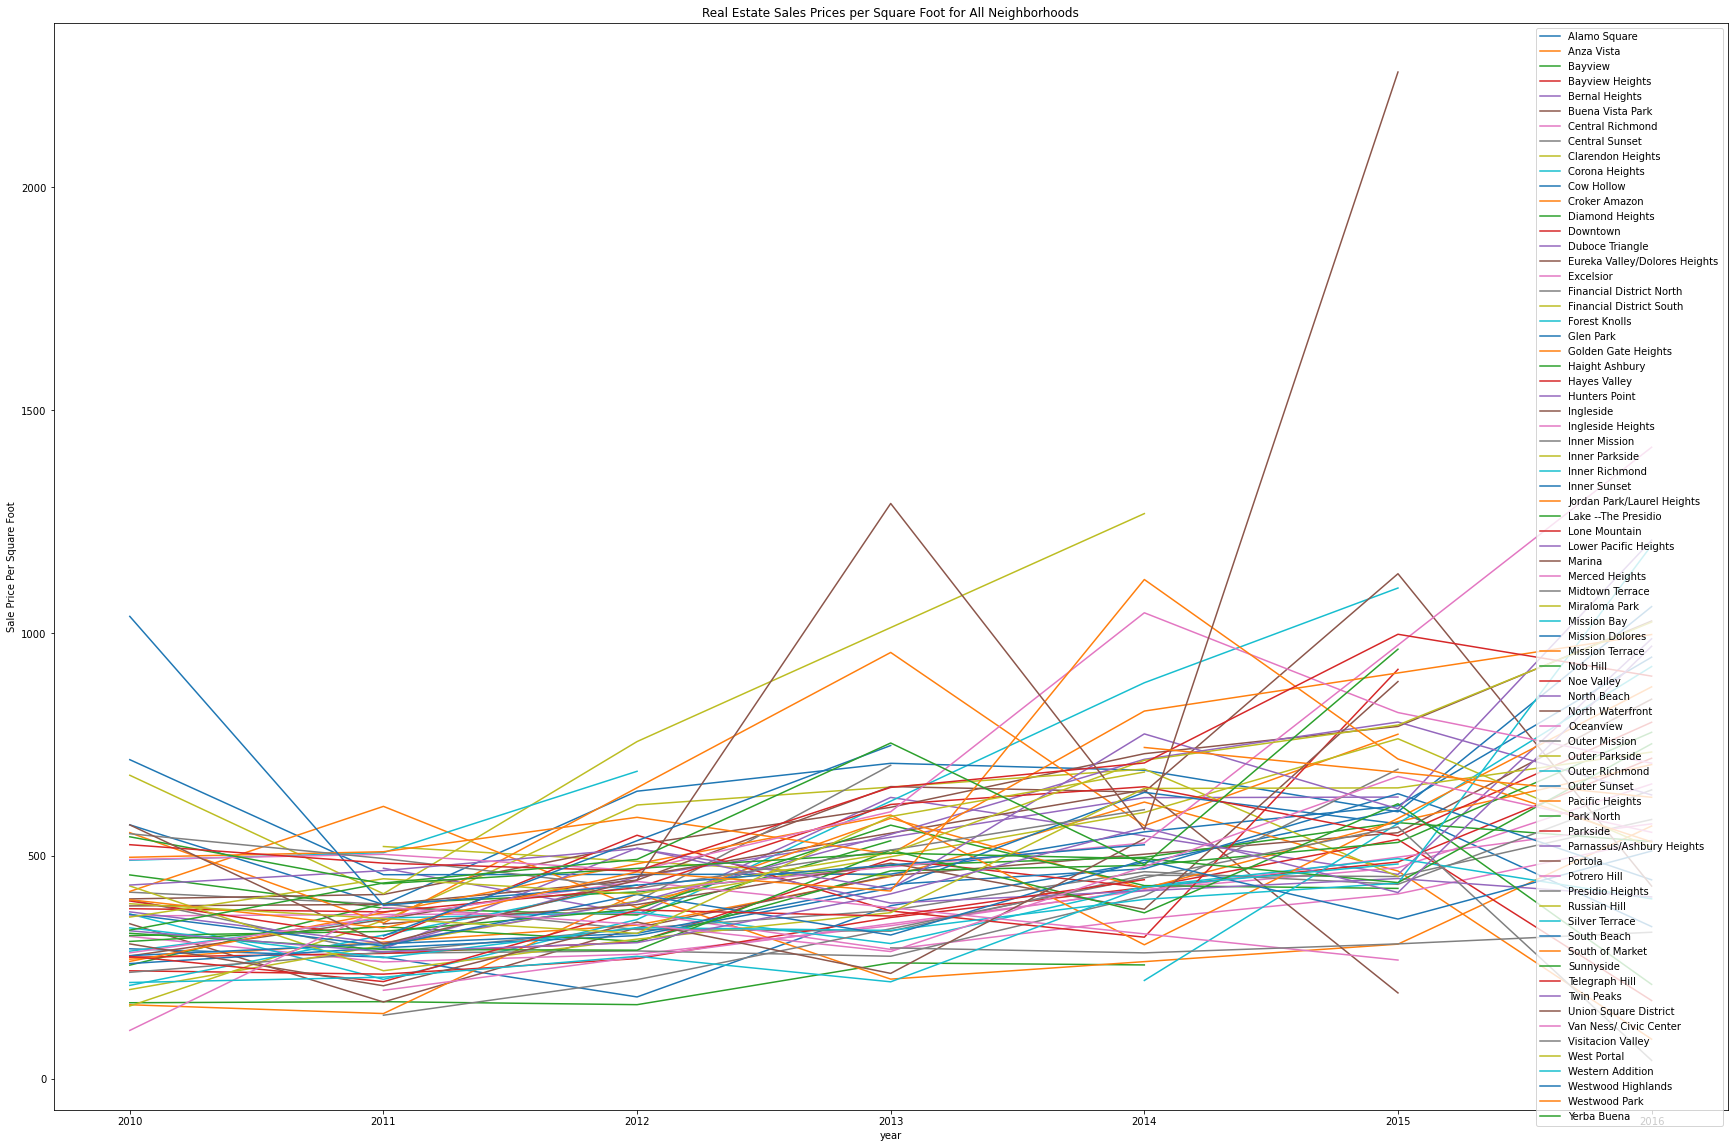

In [29]:
# Real estate sales prices per square foot for all neighborhoods from 2010 to 2016.

sfo_sales_plot = sfo_data_df.groupby('neighborhood')['sale_price_sqr_foot'].plot(
    figsize=(30,20), 
    legend=True,
    title='Real Estate Sales Prices per Square Foot for All Neighborhoods',
    x='year',
    y='sale_price_sqr_foot',
    ylabel='Sale Price Per Square Foot'
)

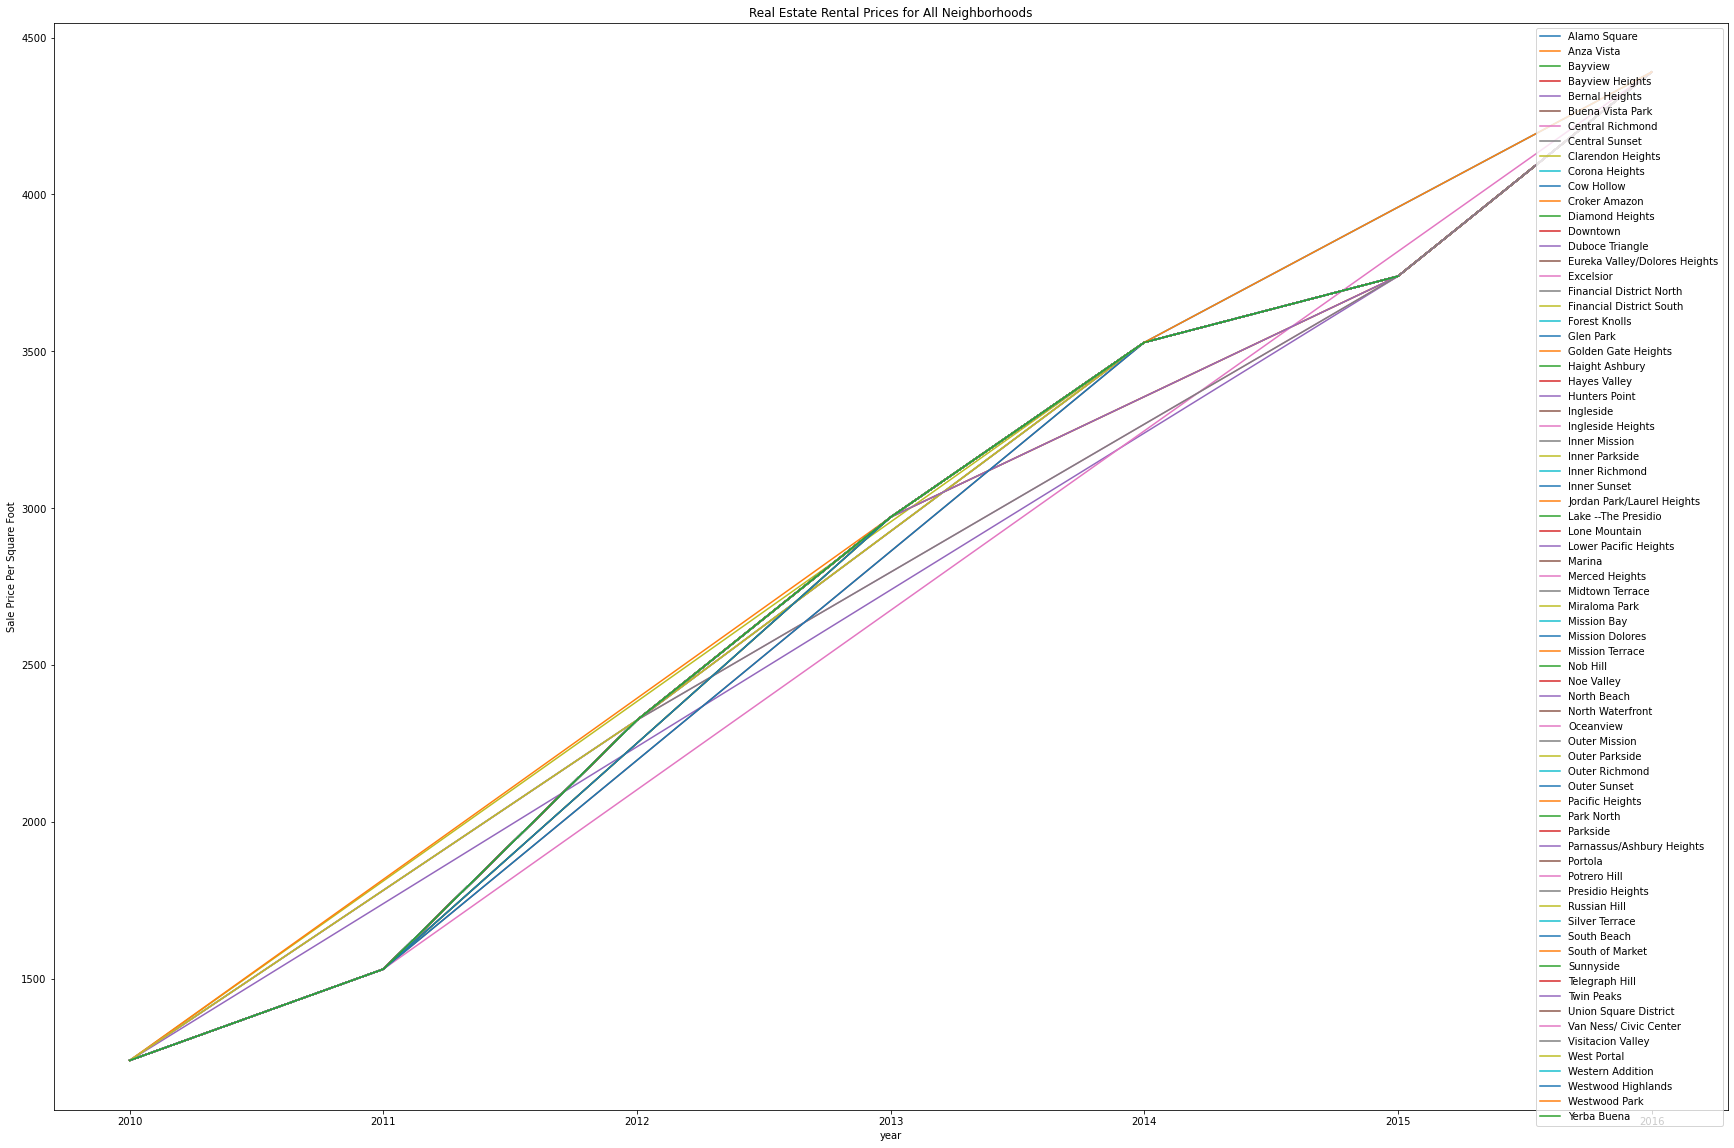

In [32]:
# Real estate rental prices for all neighborhoods from 2010 to 2016.

sfo_rent_plot = sfo_data_df.groupby('neighborhood')['gross_rent'].plot(
    figsize=(30,20), 
    legend=True,
    title='Real Estate Rental Prices for All Neighborhoods',
    ylabel='Sale Price Per Square Foot'
)

In [22]:
westwood_prices = sfo_data_df[sfo_data_df.neighborhood == 'Westwood Park'].copy()
westwood_prices.hvplot.line(
    x='year',
    y=['sale_price_sqr_foot','gross_rent'],
    hover_cols=['neighborhood','sale_price_sqr_foot','gross_rent','year'],
    alpha=0.2,
    hover_alpha=1
)

:NdOverlay   [Variable]
   :Curve   [year]   (value,neighborhood,sale_price_sqr_foot)

In [23]:
southbeach_prices = sfo_data_df[sfo_data_df.neighborhood == 'South Beach']
southbeach_prices.hvplot.line(
    x='year',
    y=['sale_price_sqr_foot','gross_rent'],
    hover_cols=['neighborhood','sale_price_sqr_foot','gross_rent','year'],
    alpha=0.2,
    hover_alpha=1
)

:NdOverlay   [Variable]
   :Curve   [year]   (value,neighborhood,sale_price_sqr_foot)

In [24]:
usquare_prices = sfo_data_df[sfo_data_df.neighborhood == 'Union Square District']
usquare_prices.hvplot.line(
    x='year',
    y=['sale_price_sqr_foot','gross_rent'],
    hover_cols=['neighborhood','sale_price_sqr_foot','gross_rent','year'],
    alpha=0.2,
    hover_alpha=1
)

:NdOverlay   [Variable]
   :Curve   [year]   (value,neighborhood,sale_price_sqr_foot)

**Question:** What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

**Answer:** The rental market has consistent growing trend across all neighborhoods. There should be a feature that helps identify the trend increase in sales prices for each neighborhood. Not all neighborhoods with high rental prices have low or stable sales prices. For example, Union Square District has a growing trend in both sales and rental markets, which leaves little room for capturing profit. Whereas, neighborhoods like South Beach and Westwood Park have consistently stable or declining sale prices with steady growth in rental prices. 